# Нелинейное программирование. Условная оптимизация

## Инициализация окружения

In [1]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import fmin
import pandas as pd
import math
from itertools import cycle

## Целевая функция

In [2]:
def target_function(x):
    x1 = x[0]
    x2 = x[1]
    return -17 * x1 ** 2 - 23 * x2 ** 2 + 8 * x1 * x2 + 182 * x1 + 266 * x2


def f2(x):
    return target_function(x)


def f(x1, x2):
    return f2([x1, x2])

## Градиент целевой функции

In [3]:
def gradient(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([-34 * x1 + 8 * x2 + 182, -46 * x2 + 8 * x1 + 266])

## Визуализация метода

In [4]:
def plot_level_contour(x1s, x2s, name, title):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'

    delta = 0.5
    x = np.arange(-1, 15, delta)
    y = np.arange(-1, 15, delta)
    X, Y = np.meshgrid(x, y)
    Z = target_function([X, Y])

    fig = plt.figure(figsize=(5, 5), dpi=120)
    CS = plt.contour(X, Y, Z, 10)
    
    for x1, x2 in zip(x1s, x2s):
        plt.plot(x1, x2)
    matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
    plt.clabel(CS, inline=1, fontsize=8)
    plt.title(title)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.savefig('../report/pics/' + name)
    plt.show()

## Метод Лагранжа

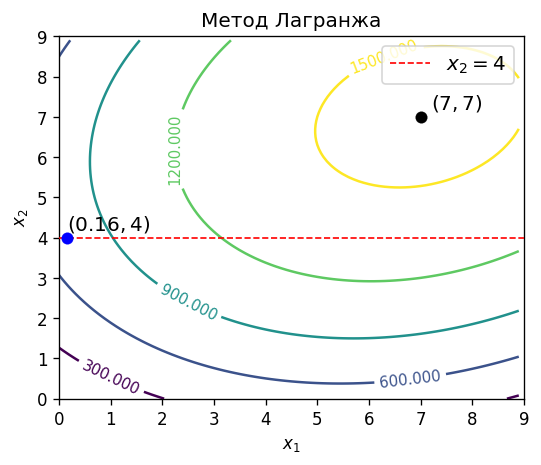

In [5]:
xlim = (0, 9)
ylim = (0, 9)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 4), dpi=120)
CS = plt.contour(X, Y, Z, 5)
plt.clabel(CS, fontsize=9, inline=1)

plt.plot([0, 9], [4, 4], c='r', linestyle='--', linewidth=1, zorder=5, label='$x_2 = 4$')

plt.text(0.16, 4.2, '$(0.16, 4)$', color='k', fontsize=12)
plt.scatter(0.16, 4, c='b', marker='o', s=50, linewidth=0.1, zorder=10)

plt.text(7.2, 7.2, '$(7, 7)$', color='k', fontsize=12)
plt.scatter(7, 7, c='k', marker='o', s=50, linewidth=0.1, zorder=10)

plt.title('Метод Лагранжа')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=1, frameon=True, fancybox=True, fontsize=12)
plt.savefig('../report/pics/lagrange', bbox_inches='tight')
plt.show()

## Метод Била

In [6]:
def g1(x):
    return (63- 9 * x) / 7

def g2(x):
    return 4 + x

def g3(x):
    return x * 0

def g4(x):
    return 0

In [7]:
X0 = [0, 0]
X1 = [0, 4]
X2 = [35/16, 99/16]
X3 = [3.402, 4.627]

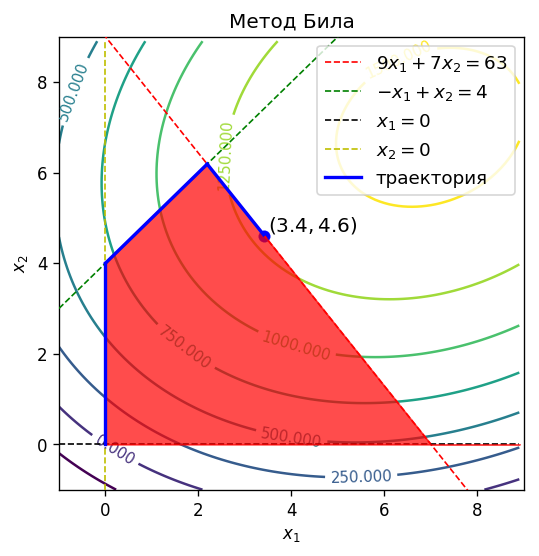

In [8]:
xlim = (-1, 9)
ylim = (-1, 9)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

ccl = cycle('rgky')
plt.plot(x, g1(x), c=next(ccl), linestyle='--', linewidth=1, zorder=5, label='$9x_1 + 7x_2 = 63$')
plt.plot(x, g2(x), c=next(ccl), linestyle='--', linewidth=1, zorder=5, label='$-x_1 + x_2 = 4$')
plt.plot(x, g3(x), c=next(ccl), linestyle='--', linewidth=1, zorder=5, label='$x_1 = 0$')
plt.plot(np.zeros(len(x)), x, c=next(ccl), linestyle='--', linewidth=1, zorder=5, label='$x_2 = 0$')

plt.text(3.5, 4.7, '$(3.4, 4.6)$', fontsize=12)
plt.scatter(3.4, 4.6, c='b', marker='o', s=50, linewidth=0.1)

l1 = g1(x)
l2 = g2(x)
l3 = g3(x)
l4 = np.clip(np.minimum(l1, l2), 0, 100)
plt.fill_between(np.clip(x, 0, 100), l3, l4, color='r', alpha=0.7, zorder=10)

plt.plot([X0[0], X1[0]], [X0[1], X1[1]], c='b', linewidth=2, zorder=10, label='траектория')
plt.plot([X1[0], X2[0]], [X1[1], X2[1]], c='b', linewidth=2, zorder=10)
plt.plot([X2[0], X3[0]], [X2[1], X3[1]], c='b', linewidth=2, zorder=10)

plt.title('Метод Била')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=0, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../report/pics/bil', bbox_inches='tight')
plt.show()


## Метод проекции градиента

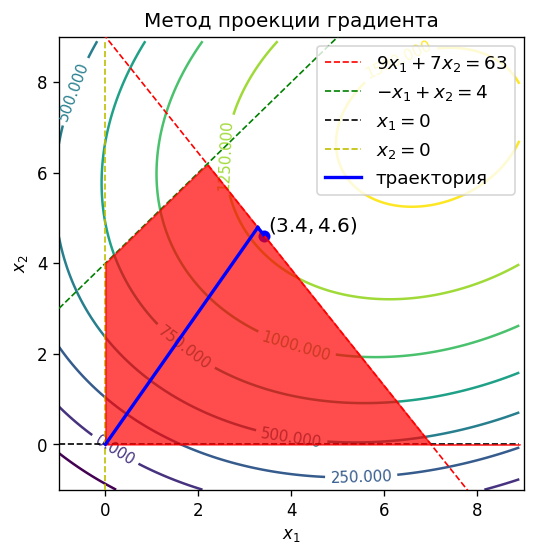

In [9]:
X0 = [0, 0]
X1 = [3.276, 4.788]
X2 = [3.402, 4.627]

xlim = (-1, 9)
ylim = (-1, 9)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

plt.title('Метод проекции градиента')
ccl = cycle('rgky')
plt.plot(x, g1(x), c=next(ccl), linestyle='--', linewidth=1, zorder=5, label='$9x_1 + 7x_2 = 63$')
plt.plot(x, g2(x), c=next(ccl), linestyle='--', linewidth=1, zorder=5, label='$-x_1 + x_2 = 4$')
plt.plot(x, g3(x), c=next(ccl), linestyle='--', linewidth=1, zorder=5, label='$x_1 = 0$')
plt.plot(np.zeros(len(x)), x, c=next(ccl), linestyle='--', linewidth=1, zorder=5, label='$x_2 = 0$')

plt.text(3.5, 4.7, '$(3.4, 4.6)$', fontsize=12)
plt.scatter(3.4, 4.6, c='b', marker='o', s=50, linewidth=0.1)

l1 = g1(x)
l2 = g2(x)
l3 = g3(x)
l4 = np.clip(np.minimum(l1, l2), 0, 100)
plt.fill_between(np.clip(x, 0, 100), l3, l4, color='r', alpha=0.7, zorder=10)

plt.plot([X0[0], X1[0]], [X0[1], X1[1]], c='b', linewidth=2, zorder=10, label='траектория')
plt.plot([X1[0], X2[0]], [X1[1], X2[1]], c='b', linewidth=2, zorder=10)
plt.plot([X2[0], X3[0]], [X2[1], X3[1]], c='b', linewidth=2, zorder=10)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=0, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../report/pics/projection', bbox_inches='tight')
plt.show()

## Метод штрафных функций

In [10]:
def g(X):
    return 9 * X[0] ** 2 + 25 * X[1] ** 2 - 225


def psi(X):
    return np.where(X < 0, np.zeros_like(X), X)


def f_penalty(x1, x2, mu=1):
    return f2([x1, x2]) - mu * psi(g([x1, x2]))


def f2_penalty(X, mu=1):
    return f2(X) - mu * psi(g(X))


In [11]:
X = []
Mu = []
for i in range(5):
    Mu.append(10**(i-3))
    X.append(fmin(lambda X: -f2_penalty(X, Mu[-1]), [0, 0]))
    i += 1
    

df = pd.DataFrame(np.column_stack((Mu, X)), columns=['mu', 'x1', 'x2'])
df['f'] = f(df.x1, df.x2)
print(df)

df.to_csv('../report/data/penaltys.csv', index=False)

Optimization terminated successfully.
         Current function value: -1566.560865
         Iterations: 81
         Function evaluations: 149
Optimization terminated successfully.
         Current function value: -1553.774574
         Iterations: 83
         Function evaluations: 163
Optimization terminated successfully.
         Current function value: -1440.646441
         Iterations: 89
         Function evaluations: 169
Optimization terminated successfully.
         Current function value: -999.534091
         Iterations: 72
         Function evaluations: 139
Optimization terminated successfully.
         Current function value: -958.287433
         Iterations: 156
         Function evaluations: 291
       mu        x1        x2            f
0   0.001  6.994236  6.991393  1567.998128
1   0.010  6.943253  6.914997  1567.817658
2   0.100  6.476347  6.231548  1552.975672
3   1.000  3.977274  3.102302  1157.509327
4  10.000  3.189489  2.310363   958.287433


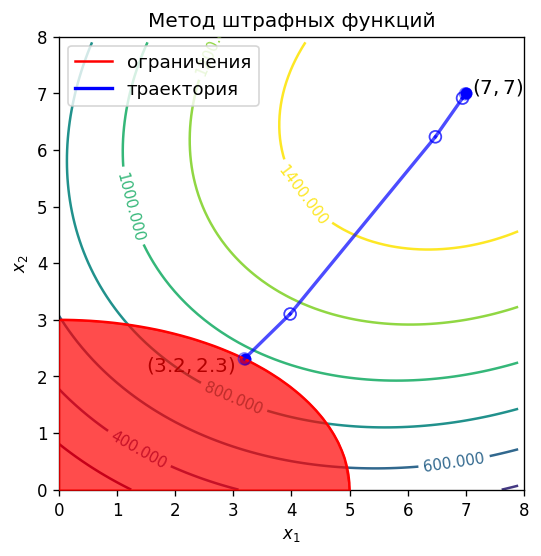

In [12]:
xlim = (0, 8)
ylim = (0, 8)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

x = np.linspace(-2, 12, 100)
y = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x,y)
F = 9 * X**2 + 25 * Y**2 - 225
plt.contour(X,Y,F,[0], colors='r')
plt.plot([10, 11], [10, 11], c='r', label='ограничения')

def circle(x1):
    return np.sqrt(225 - 9 * x1 ** 2)/5

plt.title('Метод штрафных функций')

section = np.arange(0, 5.1, 0.1)
plt.fill_between(section, circle(section), color='r', alpha=0.7, zorder=10)

plt.text(7.1, 7, '$(7, 7)$', fontsize=12)
plt.scatter(7, 7, c='b', marker='o', s=50, linewidth=0.1)

plt.text(1.5, 2.1, '$(3.2, 2.3)$', color='k', fontsize=12)
plt.scatter(3.2, 2.3, c='b', marker='o', s=50, linewidth=0.1)
for i in range(df.shape[0] - 1):
    plt.scatter([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], s=50, facecolors='none', edgecolors='blue', zorder=10, alpha=0.5)
    if i == 0:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='blue', linewidth=2, zorder=10, label='траектория')
    else:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='blue', linewidth=2, zorder=10, alpha=0.7)


plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=2, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../report/pics/penalty', bbox_inches='tight')
plt.show()

## Метод возможных направлений Зойтендейка

In [13]:
import re
with open('shit.txt', encoding='utf8') as file:
    content = file.readlines()
    
s = ''.join(content).replace('\n', ' ').replace('Значения функции:', 'f=').replace('Шаг номер: ', 'i=').strip()
s = s.replace('Координаты точки: ', '')
s = re.sub(' +', ' ', s)

In [14]:
df = pd.DataFrame(columns = ['i', 'x1', 'x2', 'u', 'f', 'k1', 'k2'])
i = 0
for si in s.split('______________________________')[2:14]:
    l = si.split(' ')
    i = int(l[2])
    x1 = float(l[7])
    x2 = float(l[8])
    u = float(l[10])
    fx = float(l[12])
    k1 = float(l[15])
    k2 = float(l[18])
    df.loc[i] = [i, x1, x2, u, fx, k1, k2]
    i += 1

In [15]:
df.loc[1] = [1, 0, 0, 1, 0, 1, -0.5437]
df.loc[14] = [14, 3.1891, 2.3106, 0.0082, 958.2874, 1, 4.6899]

df.i = df.i.astype(int)

In [16]:
df = df.sort_index()
df

,i,x1,x2,u,f,k1,k2
1,1,0.0000,0.0000,1.0000,0.0000,1.0000,-0.5437
2,2,2.5725,2.5725,23.6335,940.7058,4.0077,4.6558
3,3,2.9923,2.3442,1.0000,945.6662,1.0000,-0.5091
4,4,3.0290,2.3869,6.2420,957.0133,3.8556,4.6719
5,5,3.1444,2.3281,1.0000,957.3736,1.0000,-0.5002
6,6,3.1470,2.3312,1.6534,958.1970,3.8221,4.6842
7,7,3.1779,2.3158,1.0000,958.2225,1.0000,-0.4978
8,8,3.1781,2.3160,0.4384,958.2811,3.8137,4.6881
9,9,3.1863,2.3119,1.0000,958.2829,1.0000,-0.4972
10,10,3.1863,2.3119,0.1163,958.2870,3.8115,4.6891


In [17]:
df.to_csv('../report/data/available.csv', index=False)

d:\programs\miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


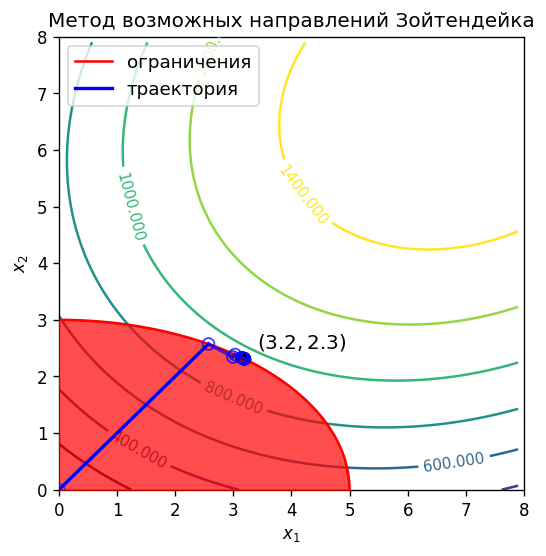

In [18]:
xlim = (0, 8)
ylim = (0, 8)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

plt.title('Метод возможных направлений Зойтендейка')

x = np.linspace(-2, 12, 100)
y = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x,y)
F = 9 * X**2 + 25 * Y**2 - 225
plt.contour(X,Y,F,[0], colors='r')
plt.plot([10, 11], [10, 11], c='r', label='ограничения')

def circle(x1):
    return np.sqrt(225 - 9 * x1 ** 2)/5

section = np.arange(-1, 6, 0.1)
plt.fill_between(section, circle(section), color='r', alpha=0.7, zorder=10)

plt.text(3.4, 2.5, '$(3.2, 2.3)$', color='k', fontsize=12)
plt.scatter(3.2, 2.3, c='k', marker='o', s=50, linewidth=0.1)

for i in np.arange(1, df.shape[0] - 1):
    plt.scatter([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], s=50, facecolors='none', edgecolors='blue', zorder=10, alpha=0.5)
    if i == 1:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='blue', linewidth=2, zorder=10, label='траектория')
    else:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='blue', linewidth=2, zorder=10, alpha=0.7)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=2, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../report/pics/available', bbox_inches='tight')
plt.show()

d:\programs\miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


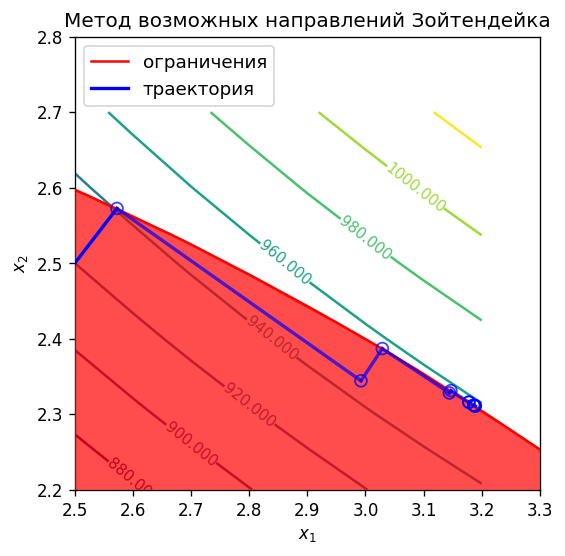

In [19]:
xlim = (2.5, 3.3)
ylim = (2.2, 2.8)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

x = np.linspace(-2, 12, 100)
y = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x,y)
F = 9 * X**2 + 25 * Y**2 - 225
plt.contour(X,Y,F,[0], colors='r')
plt.plot([10, 11], [10, 11], c='r', label='ограничения')

def circle(x1):
    return np.sqrt(225 - 9 * x1 ** 2)/5

section = np.arange(-1, 6, 0.1)
plt.fill_between(section, circle(section), color='r', alpha=0.7, zorder=10)

for i in np.arange(1, df.shape[0] - 1):
    plt.scatter([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], s=50, facecolors='none', edgecolors='b', zorder=10, alpha=0.5)
    if i == 1:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='b', linewidth=2, zorder=10, label='траектория')
    else:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='b', linewidth=2, zorder=10, alpha=0.7)

plt.title('Метод возможных направлений Зойтендейка')
        
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=2, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../report/pics/available_zoom', bbox_inches='tight')
plt.show()